In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 

%matplotlib inline

### Dataset Description

In [2]:
df = pd.read_csv('./data/train.csv', index_col=None)
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


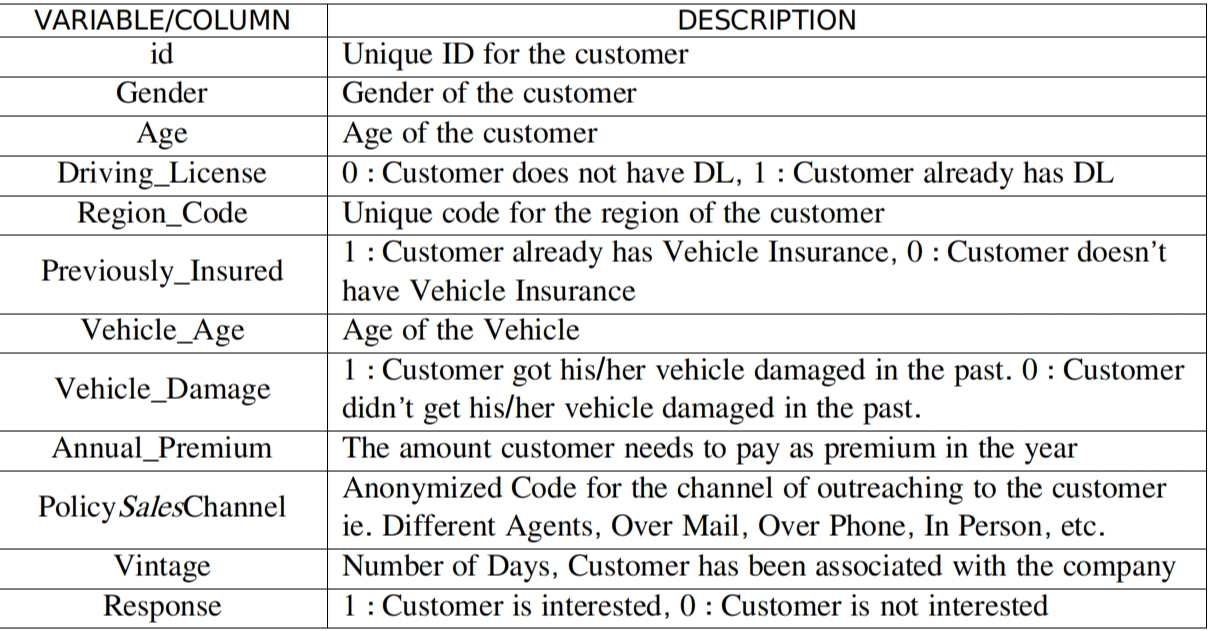

In [3]:
Image("./deskripsi_kolom.jpg")

In [4]:
## Total Rows
print(f'Jumlah baris = {df.shape[0]}')

Jumlah baris = 381109


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df.select_dtypes(include='object').nunique()

Gender            2
Vehicle_Age       3
Vehicle_Damage    2
dtype: int64

In [8]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [9]:
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,381109,"[197965, 3282]"
1,Gender,object,0,0.0,2,"[Female, Male]"
2,Age,int64,0,0.0,66,"[63, 71]"
3,Driving_License,int64,0,0.0,2,"[1, 0]"
4,Region_Code,float64,0,0.0,53,"[25.0, 22.0]"
5,Previously_Insured,int64,0,0.0,2,"[1, 0]"
6,Vehicle_Age,object,0,0.0,3,"[< 1 Year, 1-2 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[No, Yes]"
8,Annual_Premium,float64,0,0.0,48838,"[63188.0, 23059.0]"
9,Policy_Sales_Channel,float64,0,0.0,155,"[152.0, 134.0]"


In [10]:
df.Driving_License.value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [11]:
df_license = df[df['Driving_License']==1]
df_license

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


## Age Column Visualization

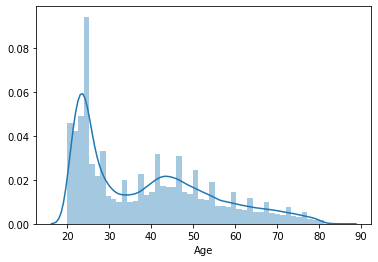

In [12]:
sns.distplot(df_license['Age'])

## Annual Premium

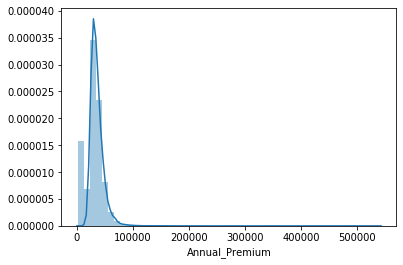

In [13]:
sns.distplot(df_license['Annual_Premium'])

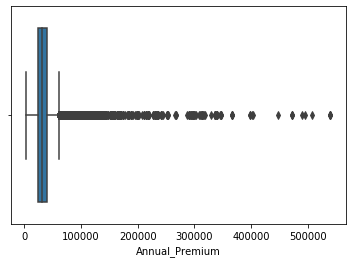

In [14]:
sns.boxplot(df_license['Annual_Premium'])

## Region Code Column

Text(0.5, 1.0, 'Distribution of Region code')

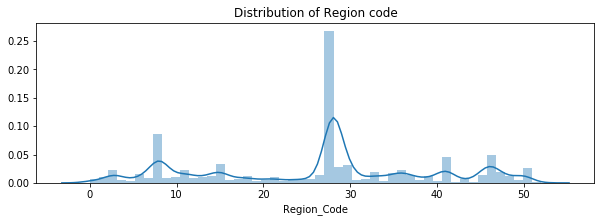

In [15]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,2)
sns.distplot(df_license['Region_Code'])
plt.title('Distribution of Region code')

In [16]:
df_license['Region_Code'].mode()

0    28.0
dtype: float64

## Policy Sales Channel

In [17]:
pd.crosstab(index=df_license['Response'],columns=df_license['Policy_Sales_Channel'])

Policy_Sales_Channel,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,10.0,11.0,...,152.0,153.0,154.0,155.0,156.0,157.0,158.0,159.0,160.0,163.0
Response,,,,,,,,,,,,,,,,,,,,,
0,1039,3,360,404,3,1403,1386,150,211,1090,...,130922,571,4516,838,8362,4888,357,50,21304,2011
1,35,1,159,102,0,181,125,17,50,108,...,3857,36,1474,394,2297,1794,135,1,475,880


In [18]:
df_license['Policy_Sales_Channel'].mode()

0    152.0
dtype: float64

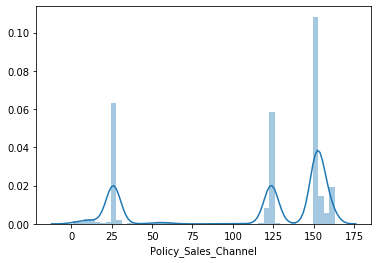

In [19]:
sns.distplot(df_license['Policy_Sales_Channel'])

## Total Responses

In [20]:
df_license.Response.value_counts()

0    333628
1     46669
Name: Response, dtype: int64

## Describing Numeric and Categoric Data

In [21]:
data_numerik =['Age', 'Region_Code','Annual_Premium','Vintage']
df_license[data_numerik].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,380297.0,38.77,15.47,20.0,25.0,36.0,49.0,85.0
Region_Code,380297.0,26.39,13.23,0.0,15.0,28.0,35.0,52.0
Annual_Premium,380297.0,30554.92,17209.08,2630.0,24401.0,31661.0,39387.0,540165.0
Vintage,380297.0,154.34,83.67,10.0,82.0,154.0,227.0,299.0


In [22]:
df_license.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,380297,380297,380297
unique,2,3,2
top,Male,1-2 Year,Yes
freq,205489,199561,191857


## Average of Annual Premium

In [23]:
df_license.pivot_table(index='Response', columns=['Vehicle_Age']
                       ,values='Annual_Premium', aggfunc='mean').round(2)

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,30387.51,30132.87,34569.69
1,31074.32,29827.42,38239.36


In [24]:
pd.crosstab(index=df_license['Previously_Insured'],columns=[df_license['Vehicle_Damage']
                                                     ,df_license['Response']], margins=True)

Vehicle_Damage          No          Yes            All
Response                 0    1       0      1        
Previously_Insured                                    
0                    23025  910  136374  45601  205910
1                   164433   72    9796     86  174387
All                 187458  982  146170  45687  380297

## Gender and Response

In [25]:
pd.crosstab(index=df_license['Gender'],columns=df_license['Response'],margins=True)

Response,0,1,All
Gender,,,
Female,156637,18171,174808
Male,176991,28498,205489
All,333628,46669,380297


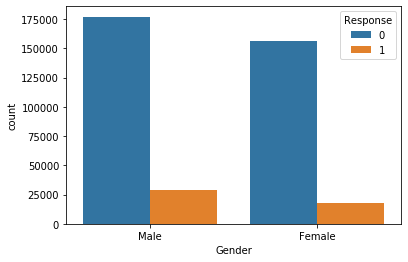

In [26]:
sns.countplot(x='Gender', hue='Response', data=df_license)

## Vehicle Damage and Vehicle Age

In [27]:
pd.crosstab(index =df_license['Vehicle_Damage'],columns=df_license['Vehicle_Age'])

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Vehicle_Damage,,,
No,71835,116590,15
Yes,127726,48195,15936


## Total Responses Based On Vehicle Age

In [28]:
df_license.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'total'}).reset_index()

,Vehicle_Age,Response,total
0,1-2 Year,0,164791
1,1-2 Year,1,34770
2,< 1 Year,0,157583
3,< 1 Year,1,7202
4,> 2 Years,0,11254
5,> 2 Years,1,4697


([<matplotlib.patches.Wedge at 0x7f9f49f2cf50>,
 [Text(-0.1747741127823229, 2.2432017317889965, '1-2 Year'),
  Text(-0.12093196433015505, -2.236733211628792, '< 1 Year'),
  Text(2.23049467326007, -0.29562393772909307, '> 2 Years')],
 [Text(-0.09709672932351271, 1.2462231843272202, '52%'),
  Text(-0.06694448025419297, -1.2381915992945096, '43%'),
  Text(1.2391637073667052, -0.16423552096060726, '4%')])

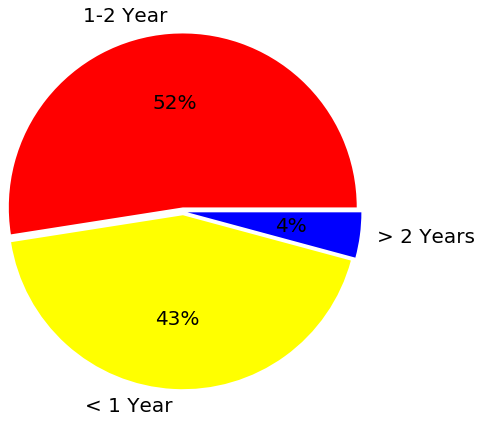

In [29]:
df_umur_kendaraan = [199561, 164785, 15951]
nama = ['1-2 Year', '< 1 Year', '> 2 Years']
plt.pie( df_umur_kendaraan, labels=nama,
        colors = ['red', 'yellow', 'blue'],
        startangle=0,
        textprops = {
            'size' : 20,
            'color' : 'black'
        },
        autopct='%1.0f%%',
        radius= 2,
        explode=(.05, .04, .05))

## Vehicle Damage and Response

In [30]:
pd.crosstab(index=df_license['Vehicle_Damage'],columns=df_license['Response'], margins=True)

Response,0,1,All
Vehicle_Damage,,,
No,187458,982,188440
Yes,146170,45687,191857
All,333628,46669,380297


## Vehicle Damage, Previously Insured, and Response

In [31]:
pd.crosstab(index=df_license['Response'],columns=[df_license['Previously_Insured'],df_license['Vehicle_Damage']])

Previously_Insured      0               1      
Vehicle_Damage         No     Yes      No   Yes
Response                                       
0                   23025  136374  164433  9796
1                     910   45601      72    86

## Vehicle Age, Vehicle Damage, and Response

In [33]:
pd.crosstab(index=df_license['Response'],columns=[df_license['Vehicle_Age']
                                                     ,df_license['Vehicle_Damage']], margins=True)

Vehicle_Age    1-2 Year         < 1 Year        > 2 Years            All
Vehicle_Damage       No     Yes       No    Yes        No    Yes        
Response                                                                
0                 71239   93552   116204  41379        15  11239  333628
1                   596   34174      386   6816         0   4697   46669
All               71835  127726   116590  48195        15  15936  380297